# Multiple Random Variables and Joint Distributions

<a id='contents'></a>

  1. [**Defining multiple random variables**](#def_mult_rand)
  1. [**Simulating pairs (or tuples) of values with `&`**](#ampersand)
  1. [**Visualizing simulation results with `.plot()`**](#plot)
  1. [**Commonly used joint distributions**](#common_joint_dist) 
  1. [**Defining independent random variables**](#def_ind_ran)
  1. [**Random vectors**](#rv)
  1. [**"Unpacking"**](#unpack)
  1. [**Marginal distributions**](#marginal)
  1. [**Covariance**](#cov)
  1. [**Correlation**](#corr)
  1. [**Transformations**](#transform)
  1. [**A caution about working with multiple random variables**](#caution)

Be sure to import Symbulate using the following commands.
<a id='joint'></a>

In [1]:
from symbulate import *
%matplotlib inline

<a id='joint'></a>

<a id='def_mult_rand'></a>
## Defining multiple random variables

Many problems involve several random variables defined on the same probability space.  Of interest are properties of the *joint distribution* which describe the relationship between the random variables. 

In the context of multiple random variables, the distribution of any single random variable is referred to as a *marginal distribution*.  Joint distributions fully specify the corresponding marginal distributions; however, the converse is not true (unless the random variables are independent.)

*Example.*  Roll two fair six-sided dice.  Let $X$ be the sum of the two dice and $Y$ the larger of the two rolls.

In [2]:
die = list(range(1, 6 + 1))
P = BoxModel(die, size=2)
X = RV(P, sum)
Y = RV(P, max)

<a id='ampersand'></a>

### Simulating pairs (or tuples) of values with `&`

Joining `X` and `Y` with an ampersand `&`  and calling `.sim()` simultaneously simulates the pair of `(X, Y)` values for each simulated outcome of the probability space.  The simulated results can be used to approximate the joint distribution of `X` and `Y` which describes the possible pairs of values and their relative likelihoods.  Likewise, tuples of values of multiple random variables can be simulated simultaneously using the ampersand `&`.  [Simulation tools](sim.html) like `.sim()`, `.tabulate()`, etc work as before.

*Example.*  Roll two fair six-sided dice.  Let $X$ be the sum of the two dice and $Y$ the larger of the two rolls.

In [3]:
die = list(range(1, 6 + 1))
P = BoxModel(die, size=2)
X = RV(P, sum)
Y = RV(P, max)
(X & Y).sim(10000).tabulate(normalize=True)

"(2, 1)",0.0286
"(3, 2)",0.0574
"(4, 2)",0.0289
"(4, 3)",0.0539
"(5, 3)",0.0537
"(5, 4)",0.0574
"(6, 3)",0.0266
"(6, 4)",0.0548
"(6, 5)",0.0585
"(7, 4)",0.0532
"(7, 5)",0.0596


<a id='plot'></a>

### Visualizing simulation results with `.plot()`

Calling `.plot()` for simulated `(X, Y)` pairs produces a *scatterplot* summary of the simulated values.  When the variables are discrete, it is recommended to use the `jitter=True` option to better visualize relative frequencies.  The `alpha=` parameter controls the level of transparency.

*Example.*  Roll two fair six-sided dice.  Let $X$ be the sum of the two dice and $Y$ the larger of the two rolls.

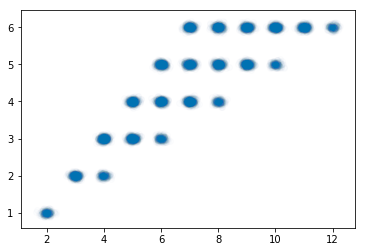

In [4]:
die = list(range(1, 6 + 1))
P = BoxModel(die, size=2)
X = RV(P, sum)
Y = RV(P, max)
(X & Y).sim(10000).plot(jitter = True, alpha = 0.01)

See the section on [Symbulate graphics](graphics.html) for more details on plotting options and functionality. 

<a id='common_joint_dist'></a>
## Commonly used joint distributions

Recall that [a `RV` can be defined by specifying its distribution directly](rv.html#distribution).  Similarly, multiple `RV`s can be defined by specifying the joint distribution directly. Several commonly used [joint distributions](common.html#joint) are built in to Symbulate.  For example, a [multivariate normal distribution](common.html#mvn) is a joint distribution parametrized by a mean vector and a covariance matrix.

In [5]:
covmatrix = [[1, -0.5],
             [-0.5, 4]]
X, Y = RV(MultivariateNormal(mean = [0, 1], cov = covmatrix)) # see below for notes on "unpacking"

Custom joint distributions can be specified using [ProbabilitySpace](probspace.html#probability_space).  For example, it is possible to [specify a joint distribution via conditional and marginal distributions](conditioning.html#conditional).

<a id='def_ind_ran'></a>
## Defining independent random variables

Intuitvely, a collection of random variables are independent if knowing the values of some does not influence the joint distribution of the others.  Random variables $X$ and $Y$ are **independent** if and only if the joint distribution factors into the product of the  corresponding marginal distributions.  That is, for independent RVs the joint distribution is fully specified by the marginal distributions.

Recall that [a `RV` can be defined by specifying its distribution directly](rv.html#distribution).  When dealing with multiple random variables it is common to specify the marginal distribution of each and assume independence.  In Symbulate, independence of distributions is represented by the asterisks `*`.  The `*` syntax reflects that under independence joints objects (i.e. cdf, pdf) are products of the corresponding marginal objects.

*Example.* Let $X$, $Y$, and $Z$ be independent, with $X$ having a Binomial(5, 0.5) distribution, $Y$ a Normal(0,1) distribution, and $Z$ a Uniform(0,1) distribution.

In [6]:
X, Y, Z = RV(Binomial(5, 0.5) * Normal(0, 1) * Uniform(0, 1))  # see below for notes on "unpacking"
(X & Y & Z).sim(10000)

0,"(2, -0.6027736499852608, 0.37206604884568517)"
1,"(2, -0.4275860222383853, 0.4569055385370363)"
2,"(1, 0.15526346946880312, 0.9712672434347334)"
3,"(3, -1.3163450889685577, 0.6076184513236067)"
4,"(3, -0.0328089274378655, 0.8343836468385954)"
5,"(2, 0.5389112649637529, 0.20529729071052416)"
6,"(1, 0.32128993163999925, 0.42263204518331254)"
7,"(2, -0.832383503062737, 0.12099586542373231)"
8,"(3, 0.8145959203095892, 0.2382660307823692)"
...,...
9999,"(3, 0.03818371315600435, 0.28040316406425403)"


The product syntax emphasizes that the random variables are defined on the same probability space (a product space).  It is also possible to define each random variable separately and then use the `AssumeIndependent` command.  The following code is equivalent to the above code.  Either syntax has the effect of creating an unspecified probability space upon which random variables $X, Y, Z$ are defined via unspecified functions such that $X$, $Y$, and $Z$ are independent and have the specified marginal distributions.

In [7]:
X = RV(Binomial(5, 0.5))
Y = RV(Normal(0, 1))
Z = RV(Uniform(0, 1)) 
X, Y, Z = AssumeIndependent(X, Y, Z)

Random variables are **independent and identically distribution (i.i.d.)** when they are independent and have a common marginal distribution.  For example, if `V` represents the number of heads in two flips of a penny and `W` the number of Heads in two flips of a dime, then `V` and `W` are i.i.d., with a common marginal `Binomial(n=2, p=0.5)` distribution.  For i.i.d. random variables, defining the joint distribution using the "exponentiation" notation [`**`](probspace.html#Independent-probability-spaces) makes the code a little more compact.

*Example.* Let $X$ and $Y$ be i.i.d. Normal(0, 1) random variables.

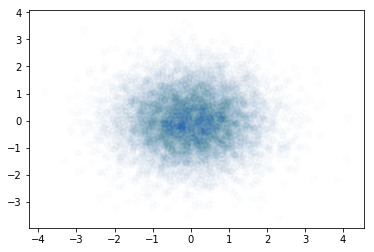

In [8]:
X, Y = RV(Normal(0,1) ** 2)  # see below for notes on "unpacking"
(X & Y).sim(10000).plot(alpha = 0.01)

<a id='rv'></a>

### Random vectors

Recall that a random variable maps an outcome in a probability space to a real number.  A **random vector** maps an outcome in a probability space to a vector of values.  In other words, a random vector is a vector of random variables.

Each realization of a random vector is a tuple of values, rather than a single value. For example, a roll of two dice could return the pair of values (sum of the rolls, larger of the rolls).  The `RV` class can be used to define random vectors as well as random variables.

*Example.* Suppose that a random vector `X` is formed by drawing two values independently, the first from a Binomial(5, 0.5) distribution and the second from a Normal(0, 1) distribution.  Note that calling `.sim()` on `X` below generates pairs of values.

In [9]:
X = RV(Binomial(5, 0.5) * Normal(0, 1))
X.sim(3)

0,"(3, 1.3773752166474593)"
1,"(2, 2.3429281221952074)"
2,"(4, -1.642702146251469)"


Components of a random vector X can be accessed using brackets `[]`.  Note that Python starts the index at 0, so the first entry of a vector `X` is `X[0]`, the second entry is `X[1]`, etc.  Each component of a random vector is a random variable so indexing using brackets produces a random variable which can be manipulated accordingly.

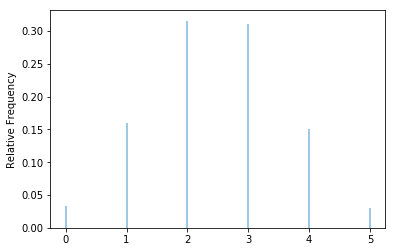

In [10]:
X = RV(Binomial(5, 0.5) * Normal(0, 1))
X[0].sim(10000).plot()

Brackets can be used to access components of the random vector itself, or the simulated values of a random vector

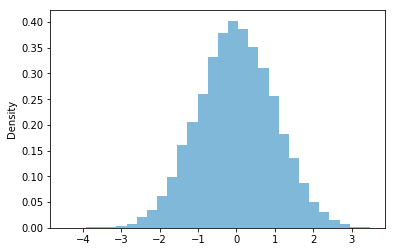

In [11]:
X = RV(Binomial(5, 0.5) * Normal(0, 1))
X.sim(10000)[1].plot()

The ampersand `&` can be used to join random variables defined on the same probability space into a random vector.

*Example.*  Roll two fair six-sided dice.  Let $X$ be the sum of the two dice and $Y$ the larger of the two rolls, and let $Z$ be the random vector $Z = (X, Y)$.

In [12]:
die = list(range(1, 6 + 1))
P = BoxModel(die, size=2)
X = RV(P, sum)
Y = RV(P, max)

Z = X & Y

Z.sim(5)

0,"(9, 6)"
1,"(8, 5)"
2,"(7, 5)"
3,"(5, 4)"
4,"(8, 4)"


In [13]:
(X & Z[0]).sim(5)

0,"(7, 7)"
1,"(11, 11)"
2,"(7, 7)"
3,"(12, 12)"
4,"(6, 6)"


<a id='unpack'></a>

### "Unpacking"

Individual components of a random vector X can be accessed using brackets, e.g. `X[0]`, `X[1]`, etc.  When a problem involves only a few random variables, it is typical to denote them as e.g. `X`, `Y`, `Z` (rather than `X[0]`, `X[1]`, `X[2]`).  Components of a random vector can be "unpacked" in this way when defining an RV, allowing for more compact syntax.

*Example.* Let $X$, $Y$, and $Z$ be independent, with $X$ having a Binomial(5, 0.5) distribution, $Y$ a Normal(0,1) distribution, and $Z$ a Uniform(0,1) distribution.  The following two cells provide two ways this situation can be defined.  The first version is the "unpacked" definition which defines the three random variables.  The second defines a random vector and then accesses each of its components with brackets.

0,"(3, -0.8820085190997768, 0.8725188862301262)"
1,"(2, -0.6942545954953674, 0.5353290337579006)"
2,"(2, 1.2847470309620233, 0.5476642083627794)"
3,"(3, -0.6128467866054531, 0.8832702148291354)"


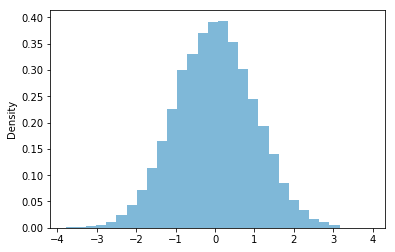

In [14]:
# unpacked version
X, Y, Z = RV(Binomial(5, 0.5) * Normal(0,1) * Uniform(0,1))
Y.sim(10000).plot()
(X & Y & Z).sim(4)

0,"(4, -1.0428058511986151, 0.648683136716311)"
1,"(4, -1.1378236916507414, 0.2145393104078711)"
2,"(3, -0.6497260814193432, 0.9109109126058534)"
3,"(3, -0.11436956951348468, 0.48894459158255144)"


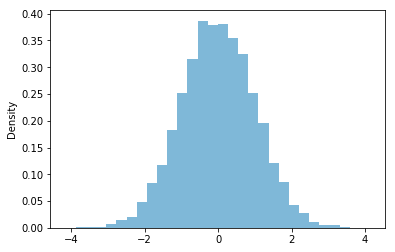

In [15]:
# vector version
XYZ = RV(Binomial(5, 0.5) * Normal(0,1) * Uniform(0,1))
X = XYZ[0]
Y = XYZ[1]
Z = XYZ[2]
Y.sim(10000).plot()
XYZ.sim(4)

<a id='marginal'></a>

### Marginal distributions

Each component of a random vector is a random variable, so unpacking or indexing using brackets produces random variables which can be manipulated accordingly to describe their marginal distribution.

When multiple random variables are simulated, applying `.mean()`, `.var()`, or `.sd()` returns the marginal means, variances, and standard deviations, respectively, of each of the random variables involved.

*Example.*  A vector of independent random variables.

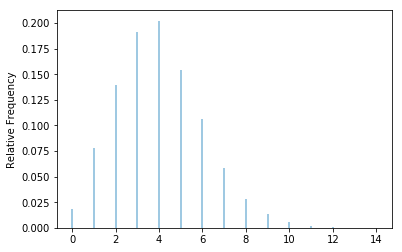

In [16]:
X = RV(Binomial(5, 0.5) * Normal(0, 1) * Poisson(4))
X[2].sim(10000).plot()

In [17]:
X.sim(10000).mean()

(2.509, -0.007249895948954117, 4.0015)

In [18]:
X.sim(10000).sd()

(1.1279847472372944, 1.0039291445416711, 1.9710758077760724)

*Example.* A [multivariate normal](common.html#mvn) example, with "unpacking".

In [19]:
covmatrix = [[1, -0.5],
             [-0.5, 4]]
X, Y = RV(MultivariateNormal(mean = [0, 1], cov = covmatrix))
xy = (X & Y).sim(10000)
xy.mean()

(0.0026913942111609413, 0.9861823423911262)

In [20]:
xy.var()

(0.9959332619981196, 4.028010152560529)

<a id='cov'></a>

### Covariance

The **covariance** between random variables $X$ and $Y$, defined as
$$
Cov(X,Y) = E[(X-E(X))(Y-E(Y))],
$$
measures the degree of linear dependence between $X$ and $Y$.  Covariance can be approximated by simulating many pairs of values of the random variables and using `.cov()`.

*Example.*  Let $X$ be the minimum and $Y$ the maximum of two independent Uniform(0,1) random variables.  It can be shown that $Cov(X,Y) = 1/36$ (and the correlation is 1/2).

0.02777717730655495

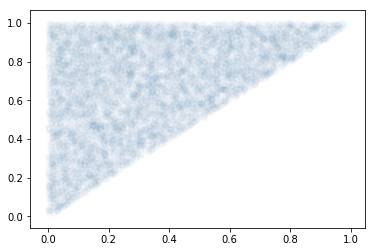

In [21]:
P = Uniform(a=0, b=1) ** 2
X = RV(P, min)
Y = RV(P, max)
xy = (X & Y).sim(10000)
plot(xy, alpha = 0.01)
xy.cov()

*Example.* A [multivariate normal](common.html#mvn) example.

In [22]:
covmatrix = [[1, -0.5],
             [-0.5, 4]]
X, Y = RV(MultivariateNormal(mean=[0, 1], cov=covmatrix)) # see below for notes on "unpacking"
xy = (X & Y).sim(10000)
xy.cov()

-0.507678298407696

When simulating more than two random variables, applying `.cov()` returns the **covariance matrix** of covariances between each pair of values (with the variances on the diagonal).

In [23]:
(X & Y & X+Y).sim(10000).cov()

array([[ 0.99574916, -0.52471274,  0.47103642],
       [-0.52471274,  3.97175643,  3.44704369],
       [ 0.47103642,  3.44704369,  3.91808011]])

<a id='corr'></a>

### Correlation

The **correlation coefficient** is a standardized measure of linear dependence which takes values in $[-1, 1]$.
$$
Corr(X,Y) = \frac{Cov (X,Y)}{\sqrt{Var(X)}\sqrt{Var(Y}} = Cov\left(\frac{X - E(X)}{SD(X)},\frac{Y - E(Y)}{SD(Y)}\right)
$$
The correlation coefficient can be approximated by simulating many pairs of values and  using `.corr()`.

*Example.* A [bivariate normal](common.html#mvn) example.

In [24]:
X, Y = RV(BivariateNormal(mean1=0, mean2=1, sd1=1, sd2=2, corr=-0.25 ))
xy = (X & Y).sim(10000)
xy.corr()

-0.2574815238793667

When simulating more than two random variables, applying `.corr()` returns the **correlation matrix** of correlations between each pair of values (with 1s on the diagonal since a variable is perfectly correlated with itself).

In [25]:
(X & Y & X+Y).sim(10000).corr()

array([[ 1.        , -0.24955397,  0.25710783],
       [-0.24955397,  1.        ,  0.87164496],
       [ 0.25710783,  0.87164496,  1.        ]])

<a id='transform'></a>

### Transformations of random variables

Random variables are often defined as functions of other random variables.  In particular, arithmetic operations like addition, subtraction, multiplication, and division can be applied to random variables *defined on the same probability space*.

*Example.* Two soccer teams score goals independently of each other, team A according to a Poisson distribution with mean 2.3 goals per goal and team B according to a Poisson distribution with mean 1.7 goals per game.  Produce a plot of the approximate distribution of the total number of goals scored in a game.

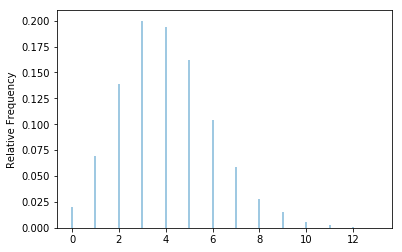

In [26]:
X, Y = RV(Poisson(lam=2.3) * Poisson(lam=1.7))
Z = X + Y
Z.sim(10000).plot()

*Example.* The coordinates of a "random point" in the $(x, y)$ plane are random variables $X$ and $Y$ chosen independently of each other, each according to a Normal(0, 1) distribution.  Produce a plot of the approximate distribution of $Z$, the distance of the $X, Y$ point from the origin.

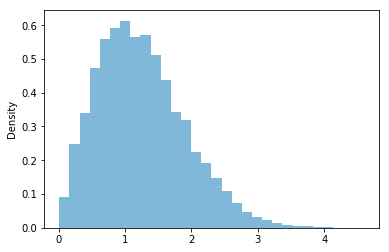

In [27]:
X, Y = RV(Normal(0, 1) ** 2)
Z = sqrt(X ** 2 + Y ** 2)
Z.sim(10000).plot()

*Example.* Let $X$ and $Y$ be i.i.d. Exponential(1) random variables.  Produce a plot of the approximate joint distribution of $W = X+ Y$ and $Z = X / W$.

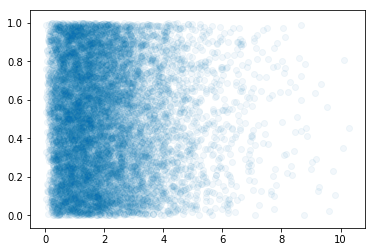

In [28]:
X, Y = RV(Exponential(1)**2)
W = X + Y
Z = X / W
(W & Z).sim(10000).plot(alpha = 0.05)

<a id='caution'></a>
## A caution about working with multiple random variables

In order to manipulate multiple random variables simulultaneously, they must be defined on the sample probability space.  Otherwise, it would not be possible to determine the *relationship* between the random variables.  Note that the following code would produce an error because the random variables are not explicitly defined on the same probability space.  In particular, Symbulate has no way of determining the joint distribution of $X$ and $Y$.  The error can be fixed by adding `X, Y = AssumeIndependent(X, Y)` before the last line, after which the code would be equivalent to the code above in the soccer example above.

```
X = RV(Poisson(2.3))  
Y = RV(Poisson(1.7))  
(X + Y).sim(10000).plot()  
```

If it is desired to define [*independent* random variables](#def_ind_ran), the independence must be made explicit, either with the product syntax `*` (or `**`) or with `AssumeIndependent`.  (The `AssumeIndependent` command has the effect of defining the random variables involved on the same probability space, a product space formed from the marginal distributions.)